# Práctica 1

##### Autor: Pilar Navarro Ramírez

In [1]:
# Cargando el fichero version_information.py
# alojado el directorio de trabajo actual
# podremos comprobar las versiones concretas
# tanto del intérprete de Python, como de los
# módulos empleados.

%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 3.5.2 64bit [GCC 5.4.0 20160609]
IPython 7.9.0
OS Linux 4.15.0 96 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.18.3
matplotlib 3.0.3
sympy 1.5.1
Fri May 01 22:05:47 2020 CEST

In [2]:
from decimal import *

In [3]:
mporig = getcontext().prec
mporig  # Esta sería la precisión con la que se trabaja por defecto

28

## Ejercicios


1.- Demuestre que la ecuación  $x^3+4 x^2=10$  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha
raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para
conseguir 5 cifras decimales exactas?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado
hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

In [2]:
x=Symbol('x')

In [3]:
def f(x):
    ''' función ejer1'''
    return sp.exp(x)+sp.exp(x)**2+1

In [7]:
a = 1; b = 2;

In [8]:
f(a),f(b)

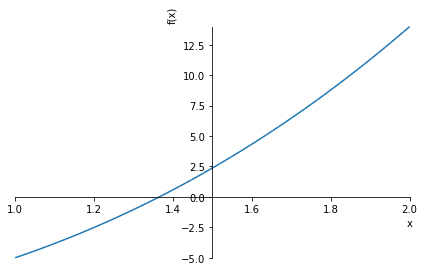

In [9]:
sp.plot(f(x),(x,a,b))

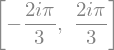

In [5]:
sol_exact = sp.solve(f(x),x) #la última solución es la real, las otras son complejas
sol_exact
#sol_exact.evalf()

**Aproximación por bisección**

In [11]:
a0 = a; b0 = b;

#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 4 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [12]:
a,b = Decimal(a),Decimal(b)
niter = 0; getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  1.365173340
Solución exacta con  4  cifras significativas 1.365
Número total de iteraciones  14


Número de iteraciones necesarias para conseguir 5 cifras decimales exactas:

In [13]:
cifras = 6 
tol = 10**(-cifras)

In [14]:
a,b = Decimal(a),Decimal(b)
niter = 0; getcontext().prec = cifras
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  1.36524
Solución exacta con  6  cifras significativas 1.36523
Número total de iteraciones  100


**Aproximación con Newton-Raphson**

In [15]:
f(x),sp.diff(f(x),x)

In [16]:
def df(x):
    ''' derivada de f'''
    return 3*x**2+8*x

In [17]:
df(x),sp.diff(df(x),x)

In [18]:
def ddf(x):
    ''' segunda derivada de f'''
    return 6*x+8

In [19]:
sign(f(a)*ddf(a))

-1

In [20]:
sign(f(b)*ddf(b))  #Tomamos el extremo b del intervalo como x0, pues el signo es positivo de este producto

1

In [21]:
tol = 10**(-3)

In [22]:
x0 = Decimal(b); niter = 0
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f(x0)/Decimal(df(x0))
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  1.365230014
Solución exacta con  6  cifras significativas 1.36523
Número total de iteraciones  4


2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos, usando el algoritmo de bisección.

In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

In [24]:
x=Symbol('x')

In [25]:
def f(x):
    ''' función ejer2'''
    return x**3-25

In [26]:
#buscar cambios de signo en una partición del intervalo
def buscaraiz(f,a,b,dx): 
    x1 = a; x2 = a + dx
    f1 = f(x1); f2 = f(x2)
    while sign(f1) == sign(f2): 
        if x1 >= b: return None,None 
        x1 = x2;  f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2

In [27]:
a,b=buscaraiz(f,0,5,0.1)

In [28]:
a,b #la solución está en este intervalo

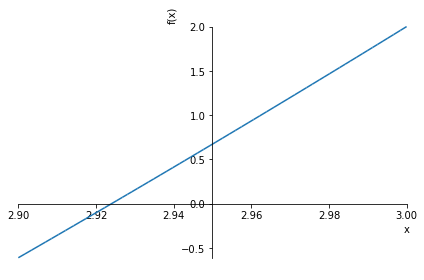

In [29]:
sp.plot(f(x),(x,a,b))

In [30]:
sol_exact = sp.solve(f(x),x)[0] #la primera solución es la real, las otras son complejas
print(sol_exact)
sol_exact.evalf()

5**(2/3)


In [31]:
a0 = a; b0 = b;

#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 3 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [32]:
a,b = Decimal(a),Decimal(b)
niter = 0; getcontext().prec = cifras
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  2.92
Solución exacta con  3  cifras significativas 2.92
Número total de iteraciones  100


3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de
un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10 cos x+x=0$.

In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

In [34]:
x=Symbol('x')

#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 7 #Numero de cifras con el que queremos trabajar
tol = 10**(-5) #toleracia, longitud mínima del intervalo donde está la sol

In [35]:
def f1(x):
    ''' función i)'''
    return x**3-x-1

In [36]:
f1(x),sp.diff(f1(x),x)

In [37]:
def df1(x):
    '''derivada de f1'''
    return 3*x**2-1

In [38]:
df1(x),sp.diff(df1(x),x)

In [39]:
def ddf1(x):
    '''segunda derivada de f1'''
    return 6*x

In [40]:
a=1;b=2;

In [41]:
sign(f1(a)*ddf1(a))

-1

In [42]:
sign(f1(b)*ddf1(b))

1

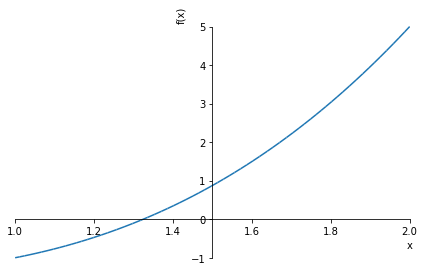

In [43]:
sp.plot(f1(x),(x,a,b))

In [44]:
sol_exact = sp.solve(f1(x),x)[2] #la última solución es la real, las otras son complejas
print(sol_exact)
sol_exact.evalf()

1/(3*(sqrt(69)/18 + 1/2)**(1/3)) + (sqrt(69)/18 + 1/2)**(1/3)


In [45]:
x0 = Decimal(b); niter = 0; 
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f1(x0)/Decimal(df1(x0))
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f1(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  1.324717957
Solución exacta con  7  cifras significativas 1.324718
Número total de iteraciones  5


In [46]:
def f2(x):
    ''' función ii)'''
    return 3*x-x**2-2+sp.exp(x)

In [47]:
f2(x),sp.diff(f2(x),x)

In [48]:
def df2(x):
    '''derivada de f2'''
    return -2*x+3+sp.exp(x)

In [49]:
df2(x),sp.diff(df2(x),x)

In [50]:
def ddf2(x):
    '''segunda derivada de f2'''
    return sp.exp(x)-2

In [51]:
sol_exact = sp.nsolve(f2(x),x,0) 
print(sol_exact)

0.257530285439861


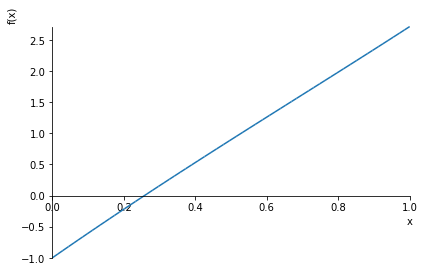

In [52]:
sp.plot(f2(x),(x,0,1))  #probando valores del intervalo en la represetación gráfica vemos que la raíz esta en [0,1]

In [53]:
a=0;b=1;

In [54]:
sign(f2(a)*ddf2(a))

In [55]:
x0 = Decimal(a); niter = 0
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f2(x0)/df2(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f2(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  0.257530285437195
Solución exacta con  7  cifras significativas 0.2575303
Número total de iteraciones  3


In [56]:
def f3(x):
    ''' función iii)'''
    return x**2+10*sp.cos(x)+x

In [57]:
f3(x),sp.diff(f3(x),x)

In [58]:
def df3(x):
    '''derivada de f3'''
    return 2*x-10*sp.sin(x)+1

In [59]:
df3(x),sp.diff(df3(x),x)

In [60]:
def ddf3(x):
    '''segunda derivada de f3'''
    return 2-10*sp.cos(x)

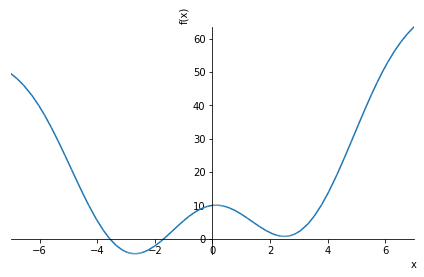

In [61]:
sp.plot(f3(x),(x,-7,7))  

Vemos en la gráfica que hay dos soluciones, buscamos gráficamente los intervalos en los que se encuentran

Primera solución:

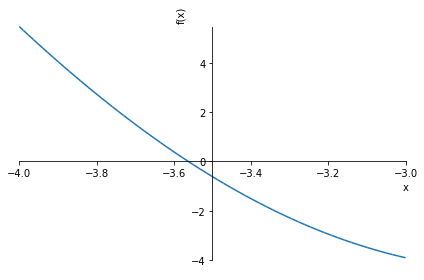

In [62]:
sp.plot(f3(x),(x,-4,-3))  

In [63]:
sol_exact = sp.nsolve(f3(x),x,-4) 
print(sol_exact)

-3.56233149723641


In [64]:
a=-4;b=-3

In [65]:
sign(f3(a)*ddf3(a))

In [66]:
x0 = Decimal(a); niter = 0
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f3(x0)/df3(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f3(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  -3.56233149723883
Solución exacta con  7  cifras significativas -3.562331
Número total de iteraciones  4


Segunda solución:

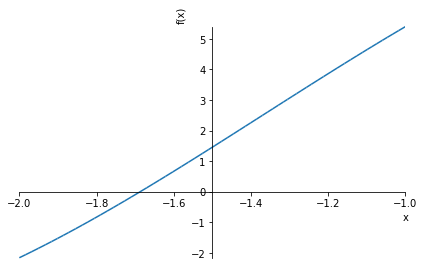

In [67]:
sp.plot(f3(x),(x,-2,-1))  

In [68]:
sol_exact = sp.nsolve(f3(x),x,-2) 
print(sol_exact)

-1.68693989979924


In [69]:
a=-2;b=-1

In [70]:
sign(f3(a)*ddf3(a))

In [71]:
sign(f3(b)*ddf3(b))

Niguno de los extremos del intervalo es un buen x0 inicial para asegurar la convergencia de Newton-Raphson. Probamos con otro valor próximo a la solución.

In [72]:
sign(f3(-1.5)*ddf3(-1.5)) #con x0=1.5 sí converge el método, por tanto lo aplicamos con este valor inicial

In [73]:
x0 = Decimal(-1.5); niter = 0
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f3(x0)/df3(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f3(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  -1.68693989979647
Solución exacta con  7  cifras significativas -1.686940
Número total de iteraciones  3


4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos, y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$,
partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

In [74]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

**i) Bisección**

In [75]:
x=Symbol('x')

In [76]:
def f(x):
    ''' función ejer4'''
    return 3*x**2+sp.exp(x)-1

In [77]:
a=0;b=1

In [78]:
f(a),f(b)  #Tenemos una raíz en 0

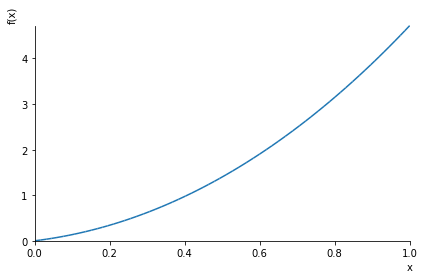

In [79]:
sp.plot(f(x),(x,a,b))

In [80]:
sol_exact = sp.nsolve(f(x),x,0) 
print(sol_exact)

0


In [81]:
a0 = a; b0 = b;
#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 5 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [82]:
niter = 0; getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  0.00000762939453125
Solución exacta con  5  cifras significativas 0
Número total de iteraciones  17


**ii) Newton-Raphson**

In [83]:
f(x),sp.diff(f(x),x)

In [84]:
def df(x):
    '''derivada de f'''
    return 6*x+sp.exp(x)

In [85]:
df(x),sp.diff(df(x),x)

In [86]:
def ddf(x):
    '''segunda derivada de f'''
    return 6+sp.exp(x)

In [87]:
sign(f(a)*ddf(a))

In [88]:
cifras = 4
tol = 10**(-cifras)

In [89]:
x0 = Decimal(a); niter = 0
getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f(x0)/df(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f(x1)) < prec:  
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  0
Solución exacta con  4  cifras significativas 0
Número total de iteraciones  1


5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.

In [90]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

In [91]:
def f(x):
    ''' función i)'''
    return x**7-x**4+2

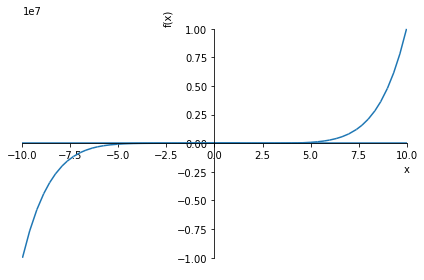

In [92]:
sp.plot(f(x),x)

In [93]:
solve(f(x),x)

'solve' no puede calcular todas las soluciones de la ecuación, la mayoría las deja indicadas como los ceros de otros polinomios. Puesto que f(x) se trata de un polinomio, intentamos calcular las raíces ahora con 'roots'.

In [94]:
coefs = [1,0,0,-1,0,0,0,2]
np.roots(coefs)

array([ 1.06110281+0.37638405j,  1.06110281-0.37638405j,
        0.15199934+1.01945595j,  0.15199934-1.01945595j,
       -0.71310215+0.98823189j, -0.71310215-0.98823189j,
       -1.        +0.j        ])

Vemos que sólo hay una raíz real, -1, el resto son raíces complejas.

In [95]:
def f(x):
    ''' función ii)'''
    return x**7+sp.cos(x)-3

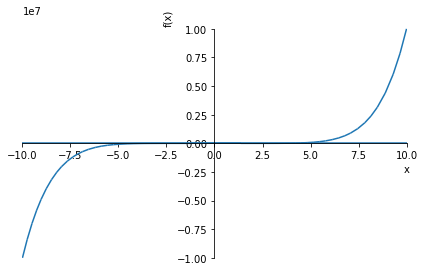

In [96]:
sp.plot(f(x),x)

Vamos dibujando la gráfica en intervalos cada vez más pequeños para ver a qué valor se encuentra próxima la solución.

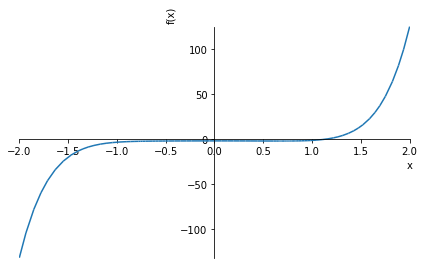

In [97]:
sp.plot(f(x),(x,-2,2))

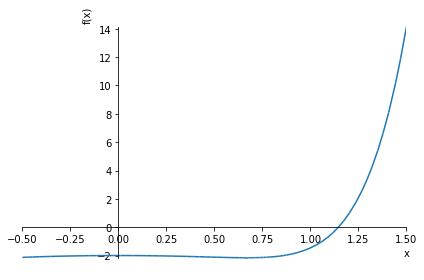

In [98]:
sp.plot(f(x),(x,-0.50,1.50))

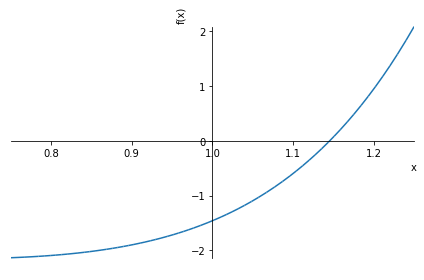

In [99]:
sp.plot(f(x),(x,0.75,1.25))

In [100]:
nsolve(f(x),x,1)

La única solución real es aproximadamente 1.145459807....

Intentamos calcular todas las soluciones complejas:

In [101]:
solveset(f(x),x)

In [102]:
#solve(f(x),x) -> no funciona por algo raro, no es capaz de resolverlo

6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos
programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [103]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

###### Lo aplicamos primeramente a la función del ejercicio 1:

In [104]:
x=Symbol('x')

In [105]:
def f(x):
    ''' función ejer1'''
    return x**3+4*x**2-10

In [106]:
a = 1; b = 2;

In [107]:
sol_exact = sp.solve(f(x),x)[2] #la última solución es la real, las otras son complejas
sol_exact.evalf()

In [108]:
#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 4 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [109]:
aproxBiseccion=[]
#a,b = Decimal(a),Decimal(b)
niter = 0; getcontext().prec = mp
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    aproxBiseccion.append(c); #Lista de las aproximaciones obtenidas
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  1.36517333984375
Solución exacta con  4  cifras significativas 1.365
Número total de iteraciones  14


In [110]:
aprox = aproxBiseccion; print(aprox)
n = len(aprox)
n

[1.5, 1.25, 1.375, 1.3125, 1.34375, 1.359375, 1.3671875, 1.36328125, 1.365234375, 1.3642578125, 1.36474609375, 1.364990234375, 1.3651123046875, 1.36517333984375]


In [111]:
k = 0; acelAitken = []; 
for k in range(n-2):
    aproxacel = aprox[k]-(aprox[k+1]-aprox[k])**2/(aprox[k+2]-2*aprox[k+1]+aprox[k])
    acelAitken.append(aproxacel); 
acelAitken

In [112]:
sol_exact = sp.solve(f(x),x)[2] #la última solución es la real, las otras son complejas
sol_exact.evalf()

En el ejercicio 1, con bisección, necesitamos 100 iteraciones para aproximar la solución con 5 cifras decimales, mientras que con la acelaración de Aitken vemos que en la iteración número 10 ya tenemos 5 cifras decimales exactas.

In [113]:
def g(x):
    return 10/(x**2+4*x)

In [114]:
N=6;i=0; acelSteff = [[] for j in range(N)]; 
acelSteff[0]=[aprox[j] for j in range(3)]
for i in range(N-1):
        aproxSteff0 = acelSteff[i][0]-(acelSteff[i][1]-acelSteff[i][0])**2/(acelSteff[i][2]-2*acelSteff[i][1]+acelSteff[i][0])
        aproxSteff1 = g(aproxSteff0); aproxSteff2 = g(aproxSteff1);
        acelSteff[i+1].append(aproxSteff0); 
        acelSteff[i+1].append(aproxSteff1);
        acelSteff[i+1].append(aproxSteff2);
acelSteff

Para implementar la aceleración de Steffensen he usado un array de arrays en el que cada subarray tiene 3 componentes, que se corresponden con $\{{x_0}^{(n)}, {x_1}^{(n)}, {x_2}^{(n)}\}$. El primer subarray tiene las tres primeras componentes de $aprox$, que es la sucesión de aproximaciones del método de bisección y que usamos para calcular $\{{x_0}^{(0)}, {x_1}^{(0)}, {x_2}^{(0)}\}$. He considerado n=5 porque a partir de ese número de iteraciones se incurre en división por 0 al ser los valores obtenidos casi iguales entre sí.

Vemos que con este método en la segunda iteración ya conseguimos 6 cifras decimales exactas y en la última iteración se obtiene un valor casi exacto de la solución.

##### Lo usamos ahora en el Ejercicio 2.

In [115]:
def f(x):
    ''' función ejercicio 2)'''
    return x**3-25

In [116]:
sol_exact = sp.solve(f(x),x)[0] #la primera solución es la real, las otras son complejas
sol_exact.evalf()

In [117]:
a=2; b=3;
cifras = 3
tol = 10**(-cifras)

In [118]:
aproxBiseccion = []
niter = 0; 
#getcontext().prec = cifras
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2
    aproxBiseccion.append(c); #Lista de las aproximaciones obtenidas
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol:
        sale = 'tolerancia'
        break

if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c))
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
#getcontext().prec = mporig # así como la precisión por defecto

Aproximación solicitada:  2.9248046875
Solución exacta con  3  cifras significativas 2.92
Número total de iteraciones  10


In [119]:
aprox = aproxBiseccion; print(aprox)
n = len(aprox)
n

[2.5, 2.75, 2.875, 2.9375, 2.90625, 2.921875, 2.9296875, 2.92578125, 2.923828125, 2.9248046875]


In [120]:
k = 0; acelAitken = []; 
for k in range(n-2):
    aproxacel = aprox[k]-(aprox[k+1]-aprox[k])**2/(aprox[k+2]-2*aprox[k+1]+aprox[k])
    acelAitken.append(aproxacel); 
acelAitken

Mientras que con bisección necesitamos 10 iteraciones para aproximar la solución con 2 cifras decimales exactas, con la aceleración de Aitken en la iteración 6 ya tenemos 2 cifras decimales exactas de la solución.

In [121]:
def g1(x):
    return x+f(x)

In [122]:
N=8;i=0; acelSteff = [[] for j in range(8)]; 
acelSteff[0]=[aprox[j] for j in range(3)]
for i in range(N-1):
        aproxSteff0 = acelSteff[i][0]-(acelSteff[i][1]-acelSteff[i][0])**2/(acelSteff[i][2]-2*acelSteff[i][1]+acelSteff[i][0])
        aproxSteff1 = g1(aproxSteff0); aproxSteff2 = g1(aproxSteff1);
        acelSteff[i+1].append(aproxSteff0); 
        acelSteff[i+1].append(aproxSteff1);
        acelSteff[i+1].append(aproxSteff2);
acelSteff

Con la aceleración de Steffensen, en la tercera iteración ya tenemos 3 cifras decimales exactas, y en la última iteración la solución es casi igual a la solución exacta. 

 7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

In [123]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

Consideramos la función $f(x)=(x-1)^3$, que tiene a 1 como raíz múltiple, con multiplicidad 3.

In [124]:
x=Symbol('x')

def f(x):
    ''' función con raíz múltiple'''
    return (x-1)**3

In [125]:
sol_exact = sp.solve(f(x),x)[0] 
sol_exact.evalf()

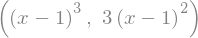

In [126]:
f(x),sp.diff(f(x),x)

In [127]:
def df(x):
    return 3*((x-1)**2)
print(df(x))

3*(x - 1)**2


In [128]:
#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 5 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [129]:
#Newton-Raphson
aproxNR = []
x0 = 0; niter = 0
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f(x0)/df(x0)
    aproxNR.append(x1);
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f(x1)) < prec:
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

sale el programa por  precision
Posiblemente solución exacta:  0.9995489070102674
Solución exacta con  5  cifras significativas 1.0000
Número total de iteraciones  19


In [130]:
#Newton-Raphson acelerado
m=3;
x0 = 0; niter = 0
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - m*f(x0)/df(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f(x1)) < prec:
        sale = 'precision'
        break
    else:
        x0 = x1  
                
print('sale el programa por ',sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

sale el programa por  precision
Posiblemente solución exacta:  1.0
Solución exacta con  5  cifras significativas 1.0000
Número total de iteraciones  1


Con Newton-Raphson necesitamos 19 iteraciones para obtener una aproximación de la solución, mientras que con el método de NR acelerado tras una iteración ya encuentra la solución exacta.

In [131]:
aprox = aproxNR; print(aprox)
n = len(aprox)
n

[0.3333333333333333, 0.5555555555555556, 0.7037037037037037, 0.8024691358024691, 0.8683127572016461, 0.9122085048010974, 0.9414723365340649, 0.9609815576893767, 0.9739877051262511, 0.9826584700841674, 0.9884389800561116, 0.9922926533707411, 0.9948617689138274, 0.9965745126092183, 0.9977163417394789, 0.9984775611596526, 0.9989850407731017, 0.9993233605154012, 0.9995489070102674]


In [132]:
k = 0; acelAitken = []; 
for k in range(n-2):
    aproxacel = aprox[k]-(aprox[k+1]-aprox[k])**2/(aprox[k+2]-2*aprox[k+1]+aprox[k])
    acelAitken.append(aproxacel); 
acelAitken

Con la aceleración de Aitken obtenemos la solución exacta en la segunda iteración, aunque en la primera la solución es también casi exacta.

In [133]:
def g(x):
    return x-f(x)

In [134]:
N=2;i=0; acelSteff = [[] for j in range(2)]; 
acelSteff[0]=[aprox[j] for j in range(3)]
for i in range(N-1):
        aproxSteff0 = acelSteff[i][0]-(acelSteff[i][1]-acelSteff[i][0])**2/(acelSteff[i][2]-2*acelSteff[i][1]+acelSteff[i][0])
        aproxSteff1 = g(aproxSteff0); aproxSteff2 = g(aproxSteff1);
        acelSteff[i+1].append(aproxSteff0); 
        acelSteff[i+1].append(aproxSteff1);
        acelSteff[i+1].append(aproxSteff2);
acelSteff

Con la aceleración de Steffensen obtenemos la solución prácticamente exacta en la primera iteración, y en la segunda podemos considerar que obtenemos la solución exacta pues el algoritmo incurre en división por 0.

Podemos así concluir que para estos casos es mejor usar el método de Newton-Raphson acelerado, pues con una sola iteración ya obtenemos la solución exacta, mientras que con la aceleración de Steffensen y de Aitken necesitamos al menos 2 iteraciones para obtenerla.


 8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del
desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

In [135]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp
import math

In [136]:
x=Symbol('x')

In [137]:
#Algoritmo de Horner
# d es el vector de los coeficientes ordenados de mayor a menor grado y x es el valor donde queremos evaluar el polinomio
def Horner(d,x): 
    valor= 0
    for i in range(0,len(d)):
        valor = valor * x + d[i]
    return valor

#Lo usamos para evaluar x^3-2x^2-5 en x=2 como ejemplo:
d = [1,-2,0,-5]
print(Horner(d,2))

-5


In [138]:
# los coeficientes de la derivada del polinomio cuyos coeficientes pasemos como argumento
def Derivada(d):
    df= []
    for i in range(0,len(d)-1):
        df.append(d[i]*(len(d)-1-i))
    return df

#Lo usamos para obtener la derivada de x^3-2x^2-5 como ejemplo:
d = [1,-2,0,-5]
Derivada(d)

In [139]:
#Cálculo del desarrollo de Taylor de orden n de un polinomio en 'c'
def DesTaylor(d,n,c):
    taylor = Horner(d,c)
    for k in range(1,n+1):
        d=Derivada(d)
        taylor = taylor + (Horner(d,c)*(x-c)**k)/math.factorial(k)
    return taylor

#Lo usamos para obtener el desarrollo de Taylor de x^3-2x^2-5 en c=2 como ejemplo:
d = [1,-2,0,-5]
DesTaylor(d,3,2)

In [140]:
def p(x):
    return 7+6*x+5*x**2+9*x**3+2*x**4+4*x**5+7*x**6+9*x**7

def dp(x):
    return sp.diff(p(x),x)

p(x),dp(x),sp.diff(dp(x),x)

In [141]:
def ddp(x):
    return 378*x**5+210*x**4+80*x**3+24*x**2+54*x+10
ddp(x)

In [142]:
sol_exact = sp.solve(p(x),x)[0]
sol_exact.evalf()

In [143]:
a=-1; b=0

In [144]:
sign(p(a)*ddp(a))

1

In [145]:
Coefp=[9,7,4,2,9,5,6,7]

In [146]:
#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 6 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [147]:
#Newton-Raphson para polinomios
x0 = Decimal(a); niter = 0;
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - Horner(Coefp,x0)/Horner(Derivada(Coefp),x0) # método de Newton-Raphson
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(Horner(Coefp,x0)) < prec:
        sale = 'precision'
        break
    else:
        x0 = x1
                
print('sale el programa por ', sale)
if sale == 'precision':
    print('Posiblemente solución exacta: ',x1)
elif k <= nmax:
    print('Aproximación solicitada: ', x1)
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

getcontext().prec = mporig # Se restaura la precisión por defecto

sale el programa por  tolerancia
Aproximación solicitada:  -0.8109429364899576450315014319
Solución exacta con  6  cifras significativas -0.810943
Número total de iteraciones  5


## Regula-Falsi

In [148]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp #calculo simbólico
sp.init_printing()   
from numpy import sign
from decimal import *

from sympy.solvers import solve, nsolve, solveset
from scipy.optimize import fsolve
from sympy import Symbol, exp

Aplicamos el método de Regula-Falsi para aproximar la solución del ejercicio 1.

In [149]:
def f(x):
    ''' función ejer1'''
    return x**3+4*x**2-10

In [150]:
a = 1; b = 2;

In [151]:
sol_exact = sp.solve(f(x),x)[2] #la última solución es la real, las otras son complejas
sol_exact.evalf()

In [152]:
#Ajuste de los criterios de parada
mp = 10
prec = 10 **(-mp) #Error máximo que tendrá la solución
nmax = 100   #Número de iteraciones máximas
cifras = 4 #Numero de cifras con el que queremos trabajar
tol = 10**(-cifras) #toleracia, longitud mínima del intervalo donde está la sol

In [153]:
#Regula_Falsi
niter = 0; getcontext().prec = mp  #10 cifras 
for k in range(nmax):
    niter = niter + 1;
    c = b-((a-b)*f(b))/(f(a)-f(b))
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if sign(f(a)) != sign(f(c)):
        b = c
    else:
        a = c
    if b-a < tol: 
        sale = 'tolerancia'
        break
        
if sale == 'precision':
    print('Posiblemente solución exacta: ',Decimal(c)) 
elif k <= nmax:
    print('Aproximación solicitada: ',Decimal(c))
else:
    print('Se llegó al número máximo de iteraciones')
print('Solución exacta con ', cifras, ' cifras significativas', sol_exact.evalf(n=cifras))
print('Número total de iteraciones ', niter)

a = a0; b = b0 # Restauramos los valores originales de a y b
getcontext().prec = mporig # así como la precisión por defecto

Posiblemente solución exacta:  1.36523001341240490802420026739127933979034423828125
Solución exacta con  4  cifras significativas 1.365
Número total de iteraciones  19
